![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **HOW TO MAKE A HISTORICAL TOTAL RETURN CHART PER YEAR?**

## **Historical total return**

<font size="3"> In this notebook we will track the historical total return of a specific stock and plot it for every year where we have data. That will show multiple paths for the total returns. Here we will show how to meake a historical total return chart per year. We will use Yahoo Finance Data for the SPX index and then calculate cumulative returns per year. If you want to know how to download the data from the yahoo finance API please take a look  <a href="https://quant-trading.co/how-to-download-data-from-yahoo-finance-api/" target="_blank">here</a>
<br><br>

In [10]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter, PercentFormatter
import matplotlib.ticker as ticker

## **Download the data**

<font size="3"> We do as usual with the yahoo finance API. 
<br><br>

In [7]:
Ticker = '^SPX'
my_ticker = yf.Ticker(Ticker)

#DATES
start_date = datetime.datetime(1970, 12, 31)
end_date = datetime.datetime(2024, 4, 15)

prices_hist = my_ticker.history(start=start_date,end=end_date)

## **Calculate returns for each year and store them in a dictionary of DataFrames**

<font size="3"> In another notebook we showed how to do something similar in great detail. Please look at this  <a href="https://quant-trading.co/how-to-plot-cumulative-returns-for-multiple-assets/" target="_blank">link</a>
<br><br>

In [8]:
prices_hist.reset_index(inplace=True)
prices_hist['Date'] = pd.to_datetime(prices_hist['Date'], utc=True)
prices_hist['year'] = prices_hist['Date'].dt.year
years_list = prices_hist['year'].unique()

min_value = 0
max_value = 0 

DataFrameDict = {elem : pd.DataFrame() for elem in years_list}
for key in DataFrameDict.keys():
    DataFrameDict[key] = prices_hist[:][prices_hist['year'] == key]
    DataFrameDict[key]['Dividends'].iloc[-1]=0
    DataFrameDict[key]['perc_Dividends']=DataFrameDict[key]['Dividends']/DataFrameDict[key]['Close']
    DataFrameDict[key]['ret'] = DataFrameDict[key]['Close']/ DataFrameDict[key]['Close'].shift(1)-1+DataFrameDict[key]['perc_Dividends']
    DataFrameDict[key]['cum_ret']=(1 + DataFrameDict[key]['ret']).cumprod()-1
    DataFrameDict[key]['cum_ret'].iloc[0]=0    
    DataFrameDict[key].reset_index(inplace=True)
    if np.array([DataFrameDict[key]['cum_ret'].min()]) < min_value:
        min_value = np.array([DataFrameDict[key]['cum_ret'].min()])[0]
    if np.array([DataFrameDict[key]['cum_ret'].max()]) > max_value:
        max_value = np.array([DataFrameDict[key]['cum_ret'].max()])[0]
    
    
my_range = max_value - min_value

## **Create the plot**

   
<font size="3"> We will use the traditional matplotlib library to do that. Below you can find an example on how to do that.
<br><br>

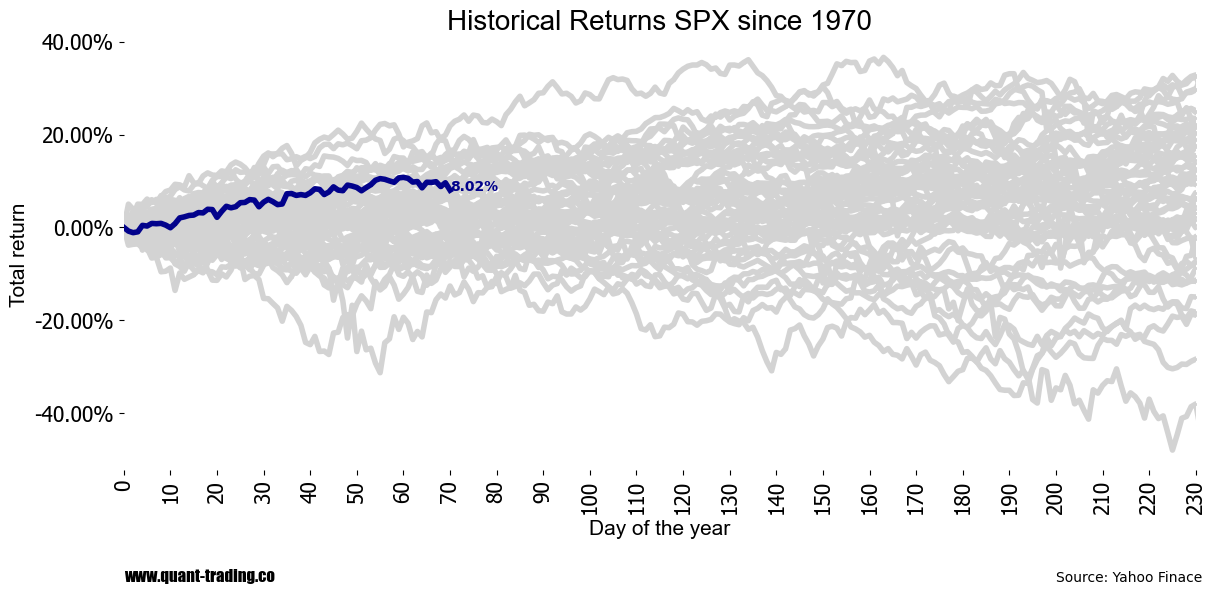

In [17]:
fig = plt.figure()

ax1 = fig.add_subplot(1,1,1)
for key in DataFrameDict.keys():
    ax1.plot(DataFrameDict[key].index,DataFrameDict[key]['cum_ret']*100,marker='o', linestyle='solid',linewidth=4,color='lightgrey',alpha=0.99,markersize=1)
ax1.plot(DataFrameDict[2024].index,DataFrameDict[2024]['cum_ret']*100,marker='o', linestyle='solid',linewidth=4,color='darkblue',alpha=0.99,markersize=1)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(10))
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([0, 230, None, None])
ax1.set_ylabel("Total return",fontname = "Arial", fontsize = 15, color = "black")
ax1.set_xlabel("Day of the year",fontname = "Arial", fontsize = 15, color = "black")
ax1.set_facecolor('white') 
ax1.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
plt.box(on=None)


ax1.text(DataFrameDict[2024].index[-1], DataFrameDict[2024]['cum_ret'].iloc[-1]*100,'{0:.2%}'.format(DataFrameDict[2024]['cum_ret'].iloc[-1]) , color='darkblue', fontsize=10,weight='bold')
ax1.text(0,(min_value-my_range/3)*100,'www.quant-trading.co' , color='black', fontsize=12,family='Impact')
ax1.text(200, (min_value-my_range/3)*100,'Source: Yahoo Finace' , color='black', fontsize=10)


plt.title("Historical Returns " + "SPX" + " since " + str(years_list[0]), size=20, family='Arial')
plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

plt.show()

If this content is helpful and you want to make a donation please click on the button below. It helps us maintain this site.

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)